In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 1344s 8us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
x_train[0].shape

(32, 32, 3)

In [8]:
import matplotlib.pyplot as plt

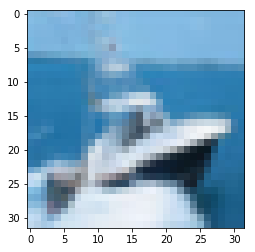

In [12]:
plt.imshow(x_train[8])

In [13]:
x_train.max()

255

In [14]:
x_train = x_train / 255

In [15]:
x_train.max()

1.0

In [16]:
x_train.min()

0.0

In [17]:
x_test = x_test/ 255

In [18]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [19]:
y_train[0]

array([6], dtype=uint8)

In [20]:
from keras.utils import to_categorical

In [21]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [22]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [23]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
from keras.models import Sequential

In [25]:
from keras.layers import Dense,Conv2D, MaxPool2D,Flatten

In [26]:
model = Sequential()

model.add(Conv2D(filters= 32, kernel_size = (4,4), input_shape = (32,32,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters= 32, kernel_size = (4,4), input_shape = (32,32,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total para

In [28]:
model.fit(x_train, y_cat_train, epochs = 10)

Epoch 1/10
50000/50000 [==============================] - 38s 761us/step - loss: 1.5140 - acc: 0.4584
Epoch 2/10
50000/50000 [==============================] - 38s 764us/step - loss: 1.1576 - acc: 0.5946
Epoch 3/10
50000/50000 [==============================] - 37s 747us/step - loss: 1.0003 - acc: 0.6525
Epoch 4/10
50000/50000 [==============================] - 35s 697us/step - loss: 0.8977 - acc: 0.6901
Epoch 5/10
50000/50000 [==============================] - 35s 702us/step - loss: 0.8227 - acc: 0.7161
Epoch 6/10
50000/50000 [==============================] - 36s 710us/step - loss: 0.7622 - acc: 0.7383
Epoch 7/10
50000/50000 [==============================] - 37s 740us/step - loss: 0.7172 - acc: 0.7570
Epoch 8/10
50000/50000 [==============================] - 35s 703us/step - loss: 0.6724 - acc: 0.7707
Epoch 9/10
50000/50000 [==============================] - 38s 770us/step - loss: 0.6402 - acc: 0.7834
Epoch 10/10
50000/50000 [==============================] - 34s 670us/step - loss: 

In [29]:
model.metrics_names

['loss', 'acc']

In [35]:
model.evaluate(x_test, y_cat_test)

10000/10000 [==============================] - 2s 177us/step


[1.1341956503868103, 0.6558]

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
predictions = model.predict_classes(x_test)

In [38]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.69      0.77      0.73      1000
          1       0.87      0.71      0.78      1000
          2       0.61      0.52      0.56      1000
          3       0.40      0.56      0.46      1000
          4       0.72      0.48      0.58      1000
          5       0.61      0.48      0.54      1000
          6       0.79      0.65      0.71      1000
          7       0.72      0.73      0.72      1000
          8       0.71      0.79      0.75      1000
          9       0.62      0.86      0.72      1000

avg / total       0.67      0.66      0.66     10000



In [39]:
confusion_matrix(y_test, predictions)

array([[769,   9,  23,  24,  11,   6,   3,  13,  82,  60],
       [ 22, 711,   6,   8,   3,   4,   9,   5,  56, 176],
       [ 85,   6, 524, 113,  50,  70,  39,  46,  35,  32],
       [ 29,  14,  66, 555,  40, 117,  39,  42,  46,  52],
       [ 49,   5,  96, 126, 485,  32,  52,  92,  26,  37],
       [ 13,   3,  53, 293,  26, 481,  22,  62,  16,  31],
       [  9,   6,  56, 171,  21,  28, 649,  14,  18,  28],
       [ 25,   5,  26,  78,  37,  40,   9, 729,  11,  40],
       [ 84,  19,   2,  16,   0,   5,   2,  11, 791,  70],
       [ 28,  41,   4,  15,   2,   3,   2,   5,  36, 864]], dtype=int64)

In [40]:
model.save('CIFAR-10.h5')

In [41]:
from keras.models import load_model

In [42]:
new_model = load_model('CIFAR-10.h5')